### Node Langgraph 
Node Langgraph is a powerful tool for building and managing language models using a graph-based approach. It allows developers to create complex language processing workflows by connecting various nodes that represent different language processing tasks.

In [1]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command , interrupt



In [ ]:
class State(TypedDict):
    mlist:List[str]
    

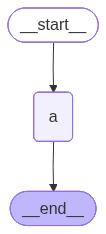

In [6]:
def node_a(state:State) -> State:
    """ node a """
    print(f"node a is receiving {state['mlist']}")
    note ="Hello world from node a"
    return (State(nlist = [note]))

builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_edge(START, "a")
builder.add_edge("a",END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))
#print(graph.get_graph().draw_mermaid())




In [7]:
initial_state = State(
    mlist = ["Hello Node, how are you"]
)
graph.invoke(initial_state)

node a is receiving ['Hello Node, how are you']


{'mlist': ['Hello Node, how are you']}

### Edges and Parallel Execution
Los Edges definen el flujo entre nodos en el grafo. Hay varios tipos:
1. EDGE NORMAL (secuencial)
2. CONDITIONAL EDGE (condicional)

### . Parallel Execution (Ejecución Paralela)
Ejecuta múltiples nodos simultáneamente para mejorar rendimiento
### Map Reduce
El patrón Map-Reduce divide trabajo en paralelo (Map) y luego combina resultados (Reduce):

```python
    summaries: Annotated[List[str], operator.add] (type, reducer)
```

### Regla principal
```sh
Cuando múltiples nodos escriben en la misma clave en paralelo, usa Annotated con un reductor adecuado (e.g., operator.add) para combinar resultados automáticamente.
```


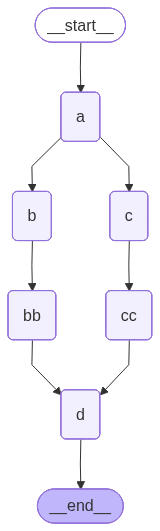

In [ ]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command , interrupt


class State(TypedDict):
    nlist: Annotated[List[str], operator.add]  # ← Reducer necesario
    
def node_a(state: State)-> State:
    """" node a """
    print(f"Adding 'A' to {state['nlist']}")
    return(State(nlist=["A"]))

def node_b(state:State) -> State:
    """ node b"""
    print(f"Add 'B' to {state['nlist']}")
    return(State(nlist=["B"]))

def node_c(state:State) -> State:
    """ node c"""
    print(f"Add 'C' to {state['nlist']}")
    return(State(nlist=["C"]))


def node_bb(state:State) -> State:
    """ node BB"""
    print(f"Add 'BB' to {state['nlist']}")
    return(State(nlist=["BB"]))


def node_cc(state:State) -> State:
    """ node CC"""
    print(f"Add 'CC' to {state['nlist']}")
    return(State(nlist=["CC"]))

def node_d(state:State) -> State:
    """ node d"""
    print(f"Add 'D' to {state['nlist']}")
    return(State(nlist=["D"]))


builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("bb", node_bb)
builder.add_node("cc", node_cc)
builder.add_node("d", node_d)


builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "bb")
builder.add_edge("c", "cc")
builder.add_edge("bb", "d")
builder.add_edge("cc", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))




In [6]:
initial_state = State(
    nlist = ["Initial String"]
)
graph.invoke(initial_state)

Adding 'A' to ['Initial String']
Addinb 'C' to ['Initial String', 'A']
Addinb 'B' to ['Initial String', 'A']
Addinb 'BB' to ['Initial String', 'A', 'B', 'C']
Addinb 'CC' to ['Initial String', 'A', 'B', 'C']
Addinb 'D' to ['Initial String', 'A', 'B', 'C', 'BB', 'CC']


{'nlist': ['Initial String', 'A', 'B', 'C', 'BB', 'CC', 'D']}

### Conditional Edges 
Los Conditional Edges permiten dirigir el flujo del grafo basado en condiciones específicas evaluadas en tiempo de ejecución. Esto es útil para crear rutas dinámicas dentro del grafo según los datos procesados.



In [ ]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command , interrupt


class State(TypedDict):
    nlist: Annotated[List[str], operator.add]  # ← Reducer necesario
    
def node_a(state: State)-> State:
    """" node a """
    print(f"Adding 'A' to {state['nlist']}")
    return(State(nlist=["A"]))

def node_b(state:State) -> State:
    """ node b"""
    print(f"Add 'B' to {state['nlist']}")
    return(State(nlist=["B"]))

def node_c(state:State) -> State:
    """ node c"""
    print(f"Add 'C' to {state['nlist']}")
    return(State(nlist=["C"]))